In [1]:
#한글폰트설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#한글폰트
plt.rc('font', family='NanumBarunGothic')
sns.set(font="NanumBarunGothic")

#파일 불러오기
df = pd.read_csv('/content/filtered_버스승하차_20231225.csv', encoding = 'euc-kr')
df.head()

,사용일자,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20231201,100,100번(하계동~용산구청),100000002,1002,창경궁.서울대학교병원(00031),98,145,20231204
1,20231201,542,542번(군포버스공영차고지~신사역),121000206,22282,서울시품질시험소한국교원단체총연합회(00057),33,22,20231204
2,20231201,542,542번(군포버스공영차고지~신사역),121000205,22281,서울시품질시험소한국교원단체총연합회(00082),33,37,20231204
3,20231201,542,542번(군포버스공영차고지~신사역),121000200,22276,우성아파트.양재초등학교(00060),109,51,20231204
4,20231201,542,542번(군포버스공영차고지~신사역),121000199,22275,우성아파트.양재초등학교(00079),24,67,20231204


# **전처리**

In [3]:
# 사용일자 20231225 제외 모든 열 제거

filtered_data = df[df['사용일자'] == 20231225]
filtered_data.head()

,사용일자,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
974479,20231225,505,505번(노온사동~서울역),102000012,3012,갈월동(00054),95,19,20231228
974480,20231225,505,505번(노온사동~서울역),102000036,3130,남영역(00044),7,104,20231228
974481,20231225,505,505번(노온사동~서울역),102000037,3131,남영역(00057),51,17,20231228
974482,20231225,505,505번(노온사동~서울역),102000038,3132,용산전자상가17동(00059),24,47,20231228
974483,20231225,505,505번(노온사동~서울역),102000039,3133,용산전자상가19동(00042),25,18,20231228


In [4]:
#필요없는 칼럼 제거

reduced_data = filtered_data[['사용일자', '노선번호', '노선명', '역명', '하차총승객수']]
reduced_data.head()

,사용일자,노선번호,노선명,역명,하차총승객수
974479,20231225,505,505번(노온사동~서울역),갈월동(00054),19
974480,20231225,505,505번(노온사동~서울역),남영역(00044),104
974481,20231225,505,505번(노온사동~서울역),남영역(00057),17
974482,20231225,505,505번(노온사동~서울역),용산전자상가17동(00059),47
974483,20231225,505,505번(노온사동~서울역),용산전자상가19동(00042),18


In [5]:
# 전처리 파일 저장

#reduced_data.to_csv('/content/filtered_버스승하차_20231225.csv', index=False, encoding='euc-kr')

In [6]:
# 노선번호별 하차승객수 합계 계산

groupby_num_data = reduced_data.groupby('노선번호')['하차총승객수'].sum().reset_index()

groupby_num_data.head()

,노선번호,하차총승객수
0,01A,9756
1,01B,4364
2,100,11790
3,101,12330
4,1014,5488


In [7]:
#groupby_num_data.to_csv('/content/버스승하차_번호별분류.csv', index=False, encoding='euc-kr')

In [8]:
# 하차총승객수 상위 10

sorted_data = groupby_num_data.sort_values(by='하차총승객수', ascending=False)

sorted_data.head(10)

,노선번호,하차총승객수
63,143,24390
114,272,21922
113,271,21548
59,130,19587
71,152,18640
115,273,18388
72,160,17871
162,421,17733
111,262,16236
66,146,16178


# **시각화**

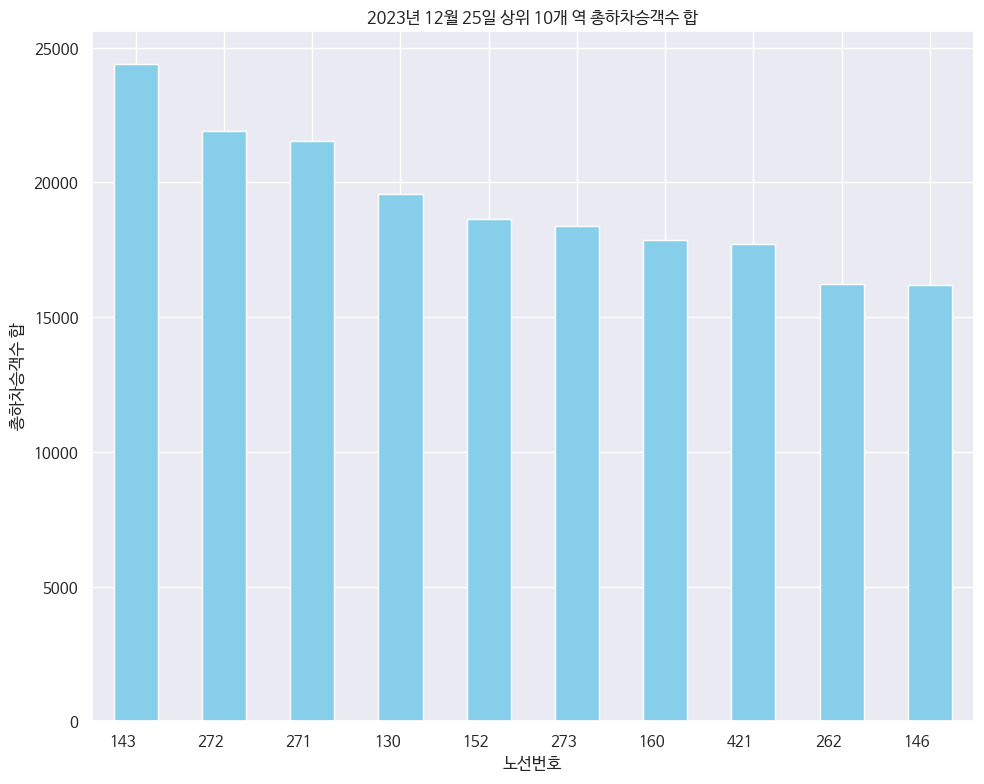

In [9]:
#버스 하차총승객수 시각화
top10_graph_data = sorted_data.head(10).set_index('노선번호')['하차총승객수']

# 그래프
plt.figure(figsize=(10, 8))
top10_graph_data.plot(kind='bar', color='skyblue')
plt.title('2023년 12월 25일 상위 10개 역 총하차승객수 합')
plt.xlabel('노선번호')
plt.ylabel('총하차승객수 합')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()

plt.show()

In [12]:
# 노선번호별로 나누기
disembarking_totals = df.groupby('노선번호')['하차총승객수'].sum().sort_values(ascending=False)

# 하차총승객수 상위 3개 노선번호
top_3_routes = disembarking_totals.head(3)

# 하차총승객수 상위3개 노선번호별 상위 3개 역
top_3_stations_by_route = {}
for route in top_3_routes.index:
    top_stations = df[df['노선번호'] == route].groupby('역명')['하차총승객수'].sum().sort_values(ascending=False).head(3)
    top_3_stations_by_route[route] = top_stations

top_3_routes, top_3_stations_by_route

(노선번호
 143    841421
 272    763049
 160    746851
 Name: 하차총승객수, dtype: int64,
 {'143': 역명
  고속터미널(00028)    46245
  롯데백화점(00020)    26762
  고속터미널(00083)    19706
  Name: 하차총승객수, dtype: int64,
  '272': 역명
  삼선교.한성대학교.조소앙활동터(00068)    25173
  서울경찰청.경복궁역(00062)          19844
  명지대사거리(00048)              17728
  Name: 하차총승객수, dtype: int64,
  '160': 역명
  영등포역(00043)       27878
  마포역(00079)        27592
  여의도환승센터(00041)    26277
  Name: 하차총승객수, dtype: int64})

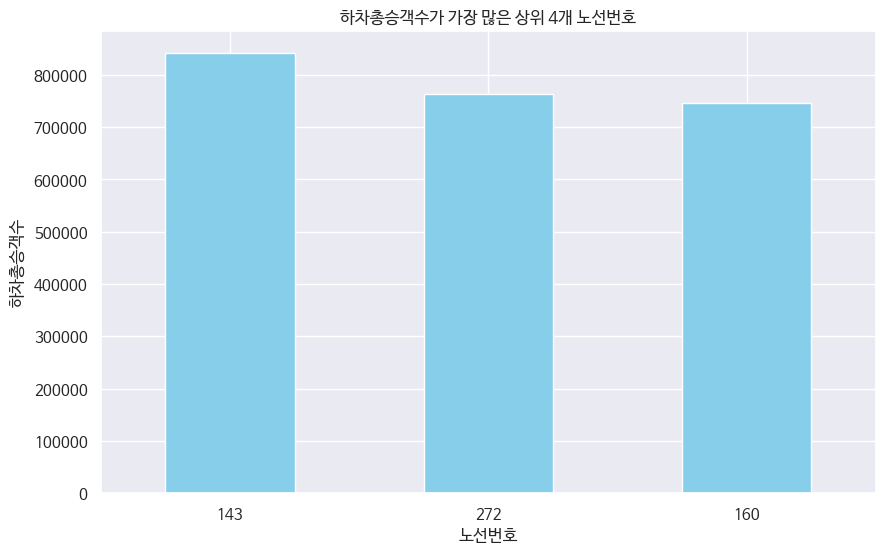

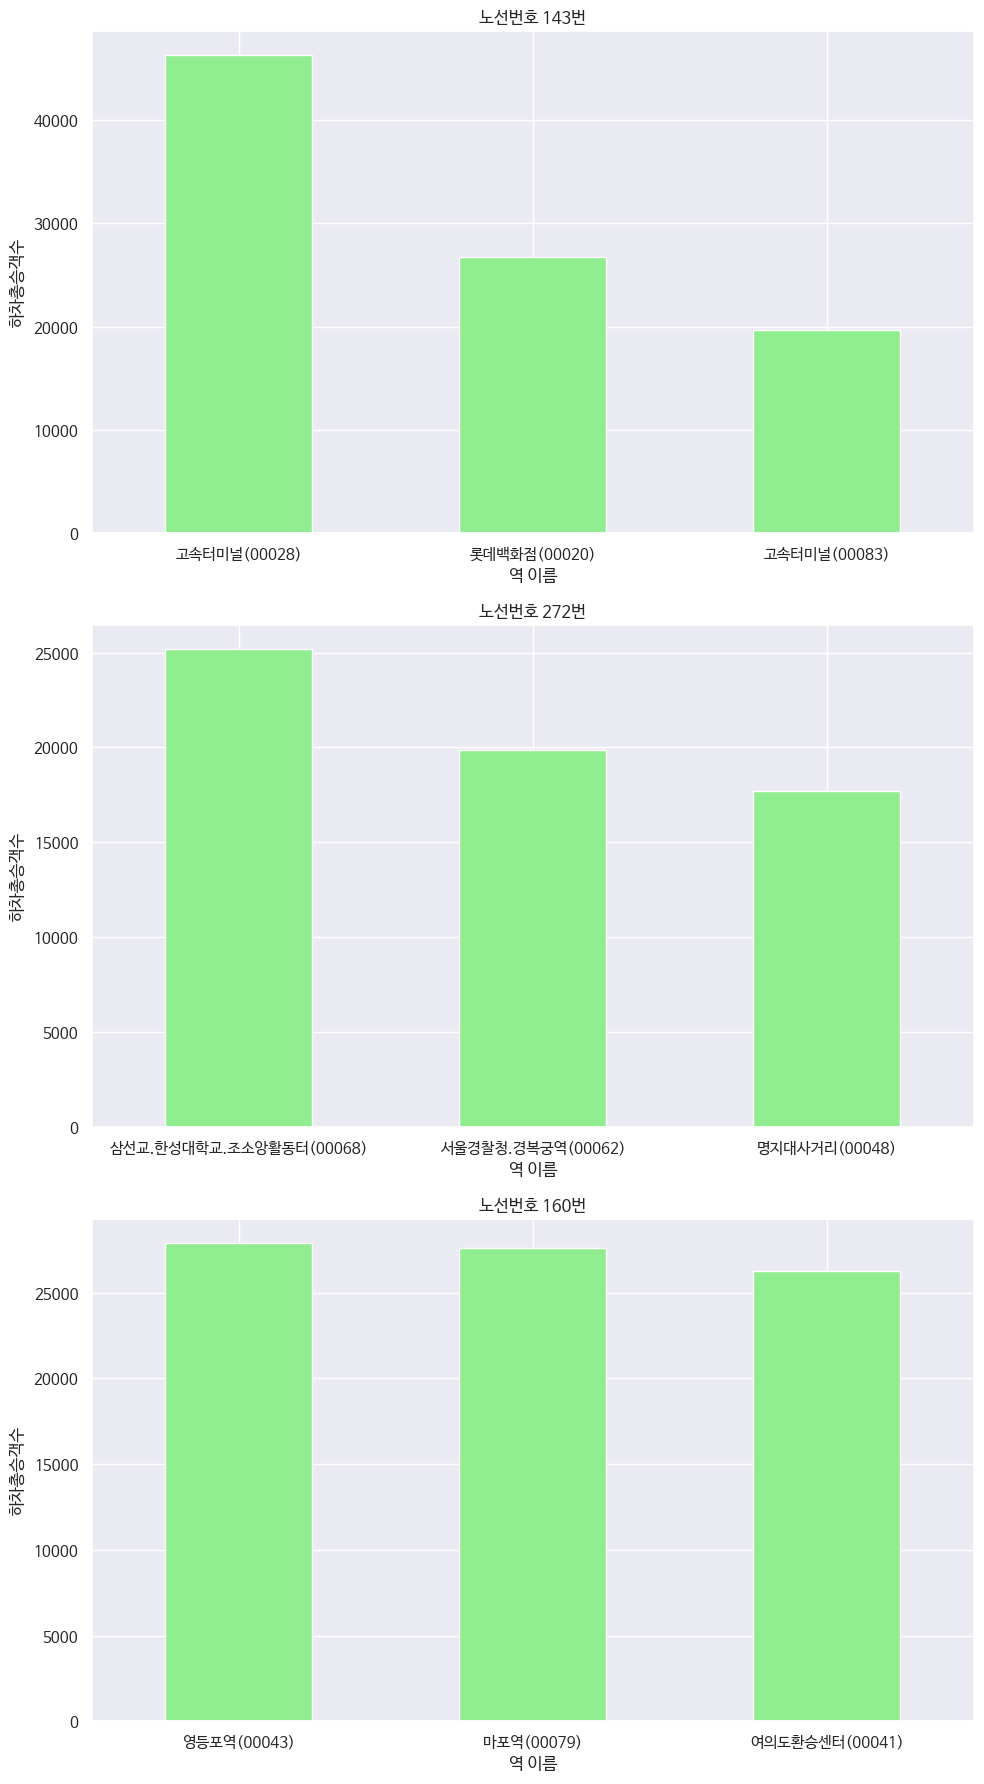

In [16]:
# 하차총승객수 상위 3개 노선번호 시각화
top_3_routes.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('하차총승객수가 가장 많은 상위 3개 노선번호')
plt.xlabel('노선번호')
plt.ylabel('하차총승객수')
plt.xticks(rotation=0)
plt.show()

# 하차총승객수 상위 3개 역 시각화
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

for i, (route, stations) in enumerate(top_3_stations_by_route.items()):
    stations.plot(kind='bar', ax=axes[i], color='lightgreen')
    axes[i].set_title(f'노선번호 {route}번')
    axes[i].set_xlabel('역 이름')
    axes[i].set_ylabel('하차총승객수')
    axes[i].tick_params(labelrotation=0)

plt.tight_layout()
plt.show()
